# ML Assignment 02 - Email Spam Detection
<br>
Problem Statement:
Classify the email using the binary classification method. <br>
Email Spam detection has two states: <br>
a) Normal State Not Spam <br> 
b) Abnormal State Spam. <br><br>
Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.
<br>
Dataset link: The emails.csv dataset on the Kaggle 
<br>https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

# Importing required libraries and dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("./emails.csv")
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data.shape

(5172, 3002)

In [4]:
data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

In [6]:
X.shape

(5172, 3000)

In [7]:
y.shape

(5172,)

# Scaling

In [17]:
from sklearn.preprocessing import scale 
X = scale(X)

# split data into train and test 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# KNN (K-Nearest Neighbors Algorithm) Classifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Prediction:  [1 0 0 ... 0 1 1]
KNN Accuracy:  0.8009020618556701
Confusion Matrix: 


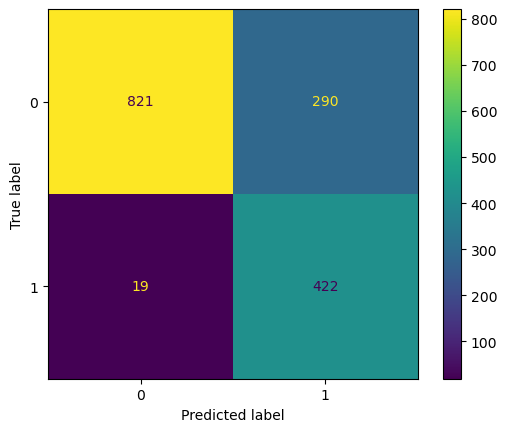

In [20]:
print("Prediction: ", y_pred)
knn_acc = metrics.accuracy_score(y_test, y_pred)
print("KNN Accuracy: ", knn_acc)
print("Confusion Matrix: ")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1111
           1       0.59      0.96      0.73       441

    accuracy                           0.80      1552
   macro avg       0.79      0.85      0.79      1552
weighted avg       0.87      0.80      0.81      1552



# SVM (Support vector machine) Classifier

# linear kernel

In [22]:
# Cost C=1
model = SVC(kernel='linear')

In [23]:
# Fit
model.fit(X_train, y_train)

SVC(kernel='linear')

Prediction:  [0 0 0 ... 0 1 0]
SVM Accuracy using Linear Kernel:  0.9432989690721649
Confusion Matrix: 


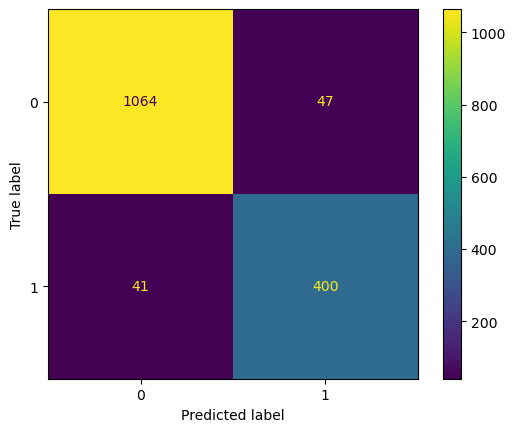

In [24]:
# predict
y_pred_lin = model.predict(X_test)
print("Prediction: ", y_pred_lin)
svm_lin_acc = metrics.accuracy_score(y_test, y_pred_lin)
print("SVM Accuracy using Linear Kernel: ", svm_lin_acc)
print("Confusion Matrix: ")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lin)

In [25]:
print(classification_report(y_test, y_pred_lin))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1111
           1       0.89      0.91      0.90       441

    accuracy                           0.94      1552
   macro avg       0.93      0.93      0.93      1552
weighted avg       0.94      0.94      0.94      1552



# Radial Basis Function (RBF) kernel

In [26]:
model = SVC(kernel='rbf')

In [27]:
model.fit(X_train, y_train)

SVC()

Prediction:  [0 0 0 ... 0 1 0]
SVM Accuracy using RBF Kernel:  0.9329896907216495
Confusion Matrix: 


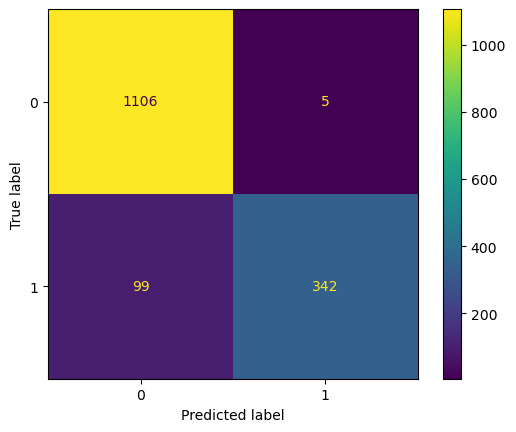

In [28]:
# predict
y_pred_rbf = model.predict(X_test)
print("Prediction: ", y_pred_rbf)
svm_rbf_acc = metrics.accuracy_score(y_test, y_pred_rbf)
print("SVM Accuracy using RBF Kernel: ", svm_rbf_acc)
print("Confusion Matrix: ")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rbf)

In [29]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1111
           1       0.99      0.78      0.87       441

    accuracy                           0.93      1552
   macro avg       0.95      0.89      0.91      1552
weighted avg       0.94      0.93      0.93      1552



In [30]:
print("KNN Accuracy: ", knn_acc)
print("SVM Accuracy using Linear Kernel: ", svm_lin_acc)
print("SVM Accuracy using RBF Kernel: ", svm_rbf_acc)

KNN Accuracy:  0.8009020618556701
SVM Accuracy using Linear Kernel:  0.9432989690721649
SVM Accuracy using RBF Kernel:  0.9329896907216495
